У цьому домашньому завданні ми будемо працювати з набором даних Tips. Нижче інформація про нього.

**Про датасет:**

Tips - це датасет, який містить інформацію про рахунки та чайові в ресторані.

**Колонки датасету:**
- `total_bill` - загальна сума рахунку (долари)
- `tip` - розмір чайових (долари)
- `sex` - стать відвідувача (Male/Female)
- `smoker` - чи курить (Yes/No)
- `day` - день тижня (Thur/Fri/Sat/Sun)
- `time` - час відвідування (Lunch/Dinner)
- `size` - розмір групи (кількість людей)

**Джерело:** Оригінальні дані зібрані в одному з американських ресторанів у 1990-х роках. Скачати і переглянути набір даних можна тут: https://www.kaggle.com/datasets/sakshisatre/tips-dataset

А також ми вже вивантажили файл з даними і завантажили вам у Матеріали до цього модуля.




**1. Гістограма розподілу рахунків**
Завантажте датасет Tips (Чайові) з файла у матеріалах `tips.csv`.
Створіть гістограму для колонки `total_bill` з 20 bins.
Опціонально можна додати підписи осей ОХ, ОУ, а також назву графіку.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df=pd.read_csv('tip_dataset.csv')
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

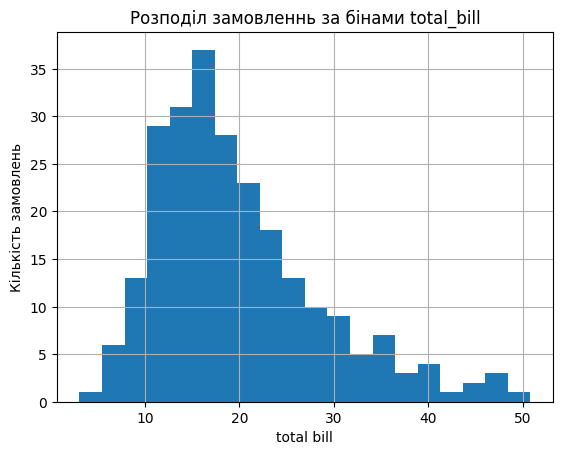

In [11]:
df['total_bill'].hist(bins=20);
plt.title('Розподіл замовленнь за бінами total_bill');
plt.xlabel('otal bill');
plt.ylabel('Кількість замовлень');

---

**2. Box plot чайових за днями тижня**

Створіть box plot, який показує розподіл чайових (`tip`) за днями тижня (`day`).
В який день навище медіанне (середнє) значення чайоивх? Зелена горизонтальна лінія всередині кожного box-plot.


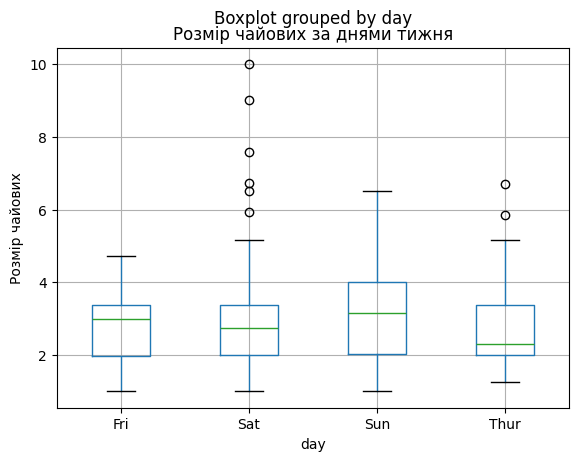

In [104]:
df.boxplot(column = 'tip', by= 'day');
plt.title('Розмір чайових за днями тижня');
plt.ylabel('Розмір чайових');


In [ ]:
print ('Найбільше чайових залишають в неділю.')

---

**3. Scatter plot: рахунок vs чайові**

Створіть діаграму розсіювання для `total_bill` та `tip`.

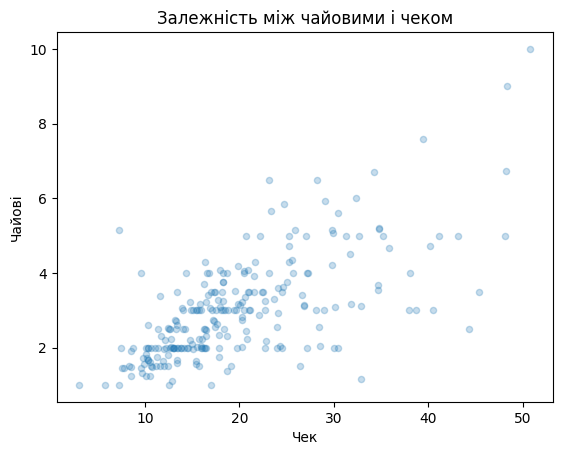

In [27]:
df.plot.scatter(x= 'total_bill', y='tip', alpha=0.25);
plt.title('Залежність між чайовими і чеком');
plt.xlabel('Чек');
plt.ylabel('Чайові');


---

**4. Bar chart: середній рахунок за часом**

Створіть стовпчасту діаграму середнього рахунку за часом дня (`time`).

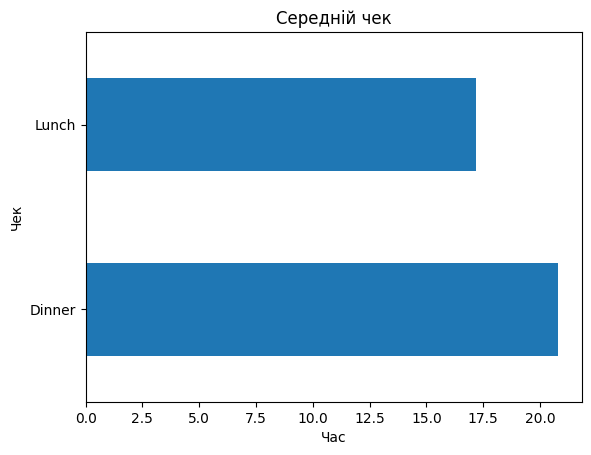

In [35]:
df.groupby(['time'])['total_bill'].mean().plot(kind='barh');
plt.title('Середній чек');
plt.xlabel('Час');
plt.ylabel('Чек');


---

**5. Інтерактивна діаграма розсіювання**

Створіть з допомогою бібліотек Plotly інтерактивний scatter plot для `total_bill` vs `tip` з кольором за статтю (`sex`).


In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [66]:
df['percent_tip'] = df['tip']/df['total_bill']
df['percent_tip']= (df['percent_tip']*100).round(2)
df.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [111]:
from numpy import size


scatter_1 = px.scatter (df, x='total_bill', y= 'tip', color='sex',
                        title='Розмір чека та чайових',
                        size='percent_tip',
                        hover_data='percent_tip',
                        trendline='ols'
                        )
scatter_1.update_layout(
    width=800,
    height=600
)
scatter_1.show();

---

**6. Інтерактивний box plot: чайові за днями та статтю**

Створіть інтерактивний box plot для чайових за днями тижня з розбивкою за кольором по статі.

In [102]:
medians = df.groupby(['day', 'sex'])[['tip', 'percent_tip']].median()
display(medians);

tip  percent_tip
day  sex                       
Fri  Female  3.000       19.510
     Male    2.600       13.375
Sat  Female  2.625       15.110
     Male    3.000       15.180
Sun  Female  3.500       16.940
     Male    3.085       15.780
Thur Female  2.005       15.310
     Male    2.530       15.550

In [114]:


boxplot_1=px.box(df, x='day', y='tip',
                 color='sex',
                 points='all',
                 title="Box plot of tips per day of week",);
boxplot_1.update_layout(
    width=1000,
    height=600
)

boxplot_1.show();

In [115]:
boxplot_2=px.box(df, x='day', y='percent_tip',
                 color='sex',
                 points='all',
                 title="Box plot of %tips per day of week",);
boxplot_2.update_layout(
    width=1000,
    height=600
)
boxplot_2.show();

В абсолютних значеннях  чоловіки залишають більші чайові, а в відносних (до суми чека) жінки на чай залишають більше.
